In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [130]:
#Read xlsx files into DF
startups = pd.read_excel('/content/P11-1000-Startups.xlsx')
Financials = pd.read_excel('/content/P11-1000-Startups.xlsx', sheet_name= 'Financials')

In [131]:
#Joining Dataframes into one DF
data = startups.join(Financials, on = 'ID', how = 'left', rsuffix = '_F')

In [137]:
data.drop(columns = ['ID_F','Name_F'], inplace = True)

In [132]:
startups['Avg_no_of_employees'] = startups.groupby('Industry')['Employees'].transform(np.mean).round(0)

In [138]:
data.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,5448571.0,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,2007778.0,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,1857830.0,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01


In [133]:
startups.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,119.0
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,108.0
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,154.0
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",204.0
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",331.0


In [134]:
Financials.head()

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [34]:
industries = startups.groupby('Industry').size().sort_values(ascending = False)

In [8]:
industries = pd.DataFrame(industries)

In [9]:
#industries.reset_index(inplace=True)
industries.rename(columns={0:'Number'}, inplace=True)


In [ ]:
industries

Let's find the earliest founded startups each industry

In [18]:
earliest_startups = pd.DataFrame(columns = startups.columns.to_list())

In [ ]:
earliest_startups

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area


In [20]:
industry_grup = startups.groupby('Industry')

In [24]:
# Find the earliest founded startup in each industry
for industry, year in industry_grup:
  the_min_year = year.nsmallest(n=1, columns = 'Year Founded')
  earliest_startups = earliest_startups.append(the_min_year)

In [25]:
# Optional export data to xlsx file
earliest_startups.to_excel('earliest_startups.xlsx')

In [28]:
earliest_startups.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area
291,292,Fintax,Advertising & Marketing,Provides a comprehensive lead serivce package ...,2000,12,IL,Chicago,Chicago
111,112,Keycone,Business Products & Services,Develops online systems that give health insur...,2000,62,CT,Madison,"New Haven-Milford, CT"
56,57,Tindex,Computer Hardware,Provides clients with a streamlined purchasing...,2011,11,MN,Spring Park,Minneapolis


Let's check which industry hire the highest number of employees

In [36]:
indus = startups.groupby('Industry').agg({'Employees': [np.mean, np.sum]})

In [37]:
indus.columns = [x + y.capitalize() for x,y in indus.columns.values]

In [38]:
#indus.reset_index(inplace=True)
indus.rename(columns={'EmployeesMean':'Employees_Mean', 'EmployeesSum':'Employees_Sum'}, inplace=True)

In [39]:
indus.reset_index(inplace = True)

In [33]:
indus['Employees_Mean'] = indus['Employees_Mean'].round(0)

In [ ]:
indus

No handles with labels found to put in legend.


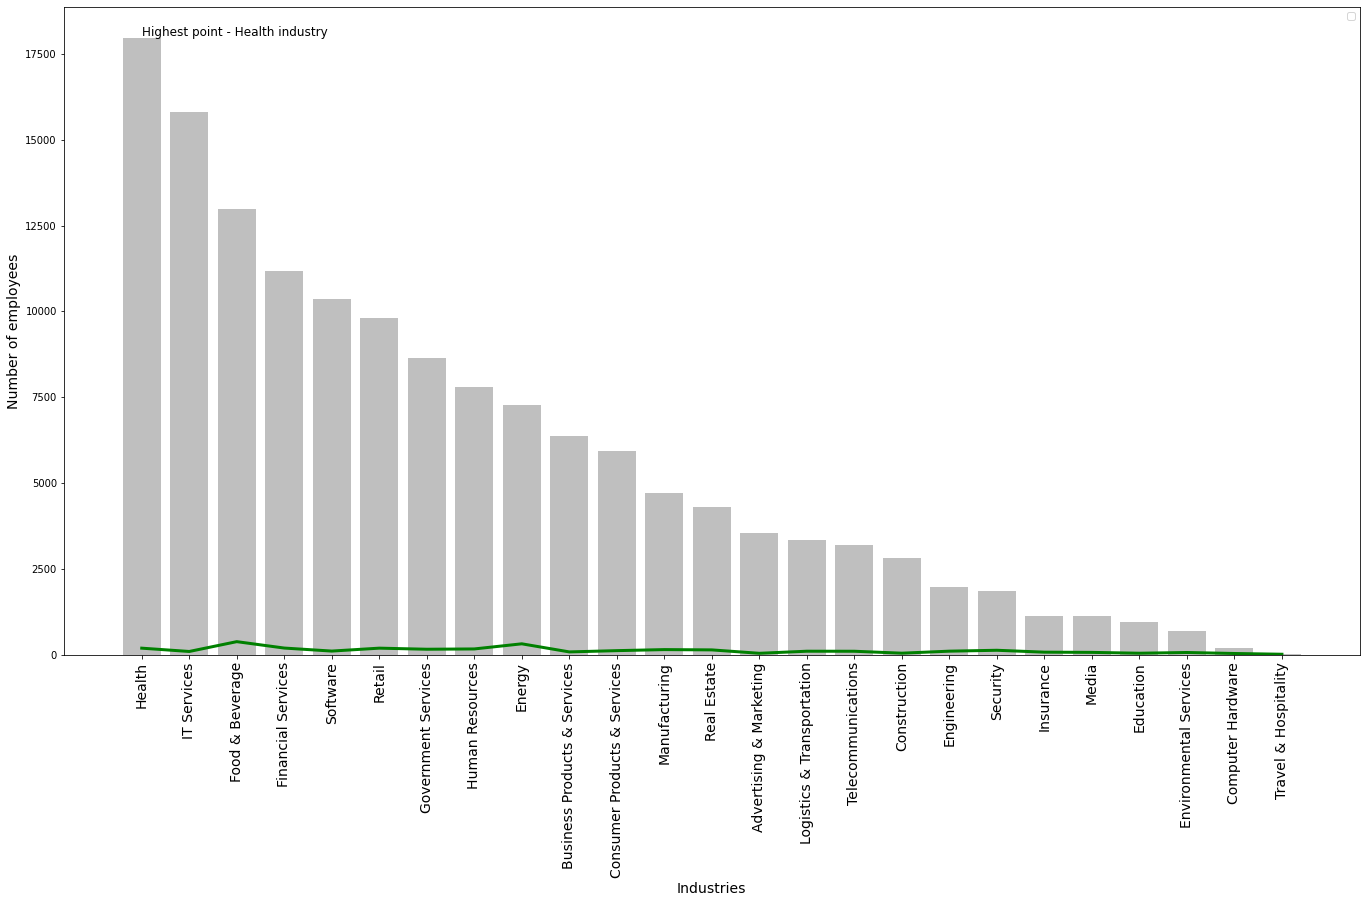

In [122]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])

x1 = indus['Industry']
x2 = indus['Employees_Mean']
x3 = indus['Employees_Sum']
plt.xticks(rotation=90, size = 14) 
plt.ylabel('Number of employees', size = 14)
plt.xlabel('Industries', size = 14)
ax.plot(x1,x2, color = 'g', linewidth=3.0)
ax.bar(x1,x3, color = 'grey', alpha = 0.5)
ax.annotate('Highest point - Health industry', xy = ('Health', 18000), size = 12, color = 'black')

#plt.savefig('Chart_basic.png', dpi = 300)

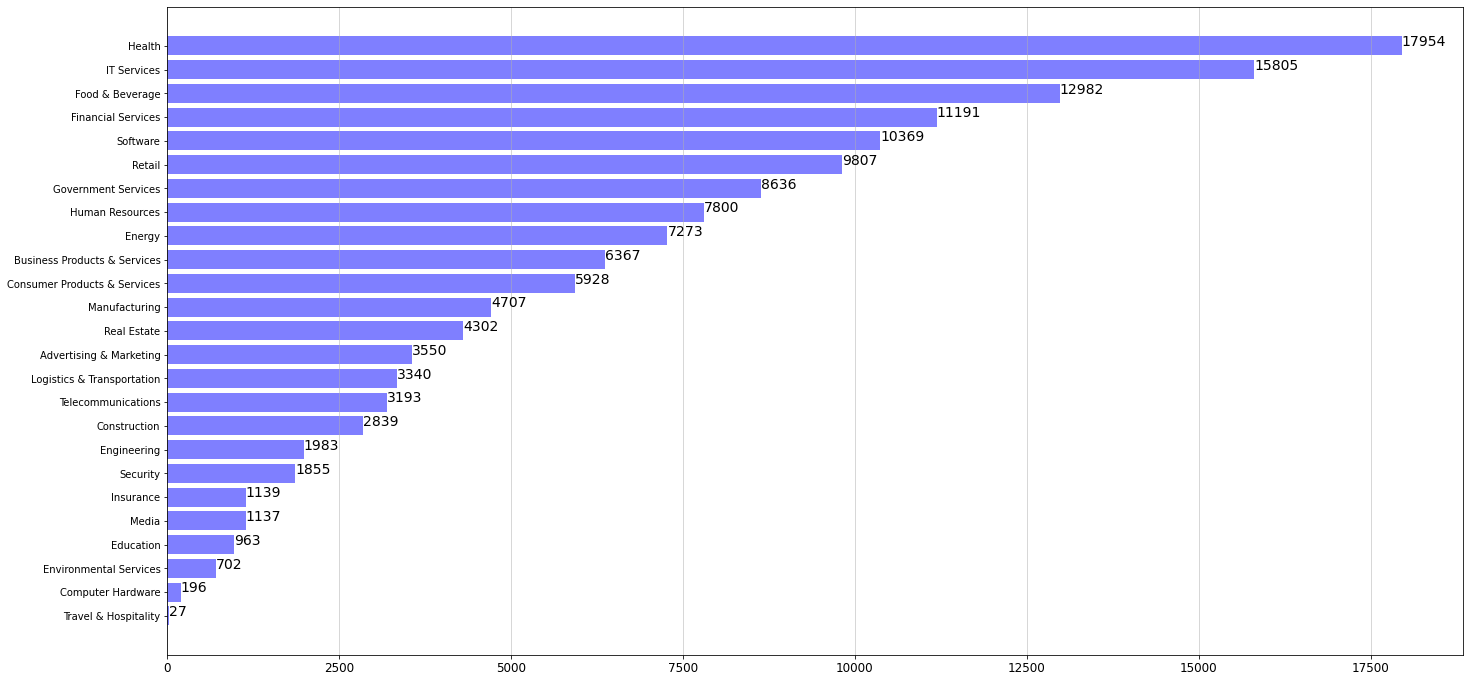

In [192]:
#Number of employess in each industry

fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])
indus.sort_values(by = 'Employees_Sum', ascending=True, inplace = True)

x1 = indus['Industry']
x2 = indus['Employees_Sum']

for Index, Sum in enumerate(indus['Employees_Sum']):
    ax.annotate(Sum, xy = (Sum,Index), size = 14)

plt.barh(x1,x2, color = 'blue', alpha = 0.5)
ax.xaxis.grid(linestyle = '-', linewidth = 0.5)
plt.xticks(size = 12)
plt.show()




In [ ]:
#indus.sort_values(by = 'Employees_Sum', ascending=False)

In [172]:
#Columns with 2015 data
#filter_col = [col for col in data if col.startswith('2015')]

Exploratory Data Analysis - Financial Data (2015)


In [185]:
#Base informations
Financials_2015 = data.iloc[0:,:13]

In [187]:
Financials_2015.isnull().sum()

ID                0
Name              0
Industry          0
Description       1
Year Founded      0
Employees         0
State             0
City              0
Metro Area       11
2015 Revenue      1
2015 Expenses     1
2015 Profit       1
2015 Growth %     1
dtype: int64

In [194]:
#The higest revenue in each industry

array(['Software', 'IT Services', 'Real Estate', 'Retail', 'Energy',
       'Advertising & Marketing', 'Logistics & Transportation',
       'Human Resources', 'Insurance', 'Financial Services',
       'Food & Beverage', 'Construction', 'Telecommunications', 'Health',
       'Business Products & Services', 'Consumer Products & Services',
       'Government Services', 'Computer Hardware', 'Engineering',
       'Education', 'Security', 'Media', 'Manufacturing',
       'Environmental Services', 'Travel & Hospitality'], dtype=object)

In [210]:
best_revenue_2015 = pd.DataFrame(columns = Financials_2015.columns)

In [200]:
financial_industry = Financials_2015.groupby('Industry')

In [211]:
for revenue, industry in financial_industry:
  higest_revenue = industry.nlargest(n=1, columns = '2015 Revenue')
  best_revenue_2015 = best_revenue_2015.append(higest_revenue)

In [242]:
best_revenue_2015['Avg_2015_Revenue'] = best_revenue_2015['2015 Revenue'].mean()

In [246]:
best_revenue_2015['2015 Revenue'] - best_revenue_2015['Avg_2015_Revenue']

917    2821754.534
636     570327.474
56    -2478288.806
123    -160010.746
281    -771933.286
324     989604.324
615     823170.404
80     -620097.046
171   -2286528.506
79     -359616.236
230    1973665.824
511    3531044.084
612     601369.094
979     691062.394
28      598415.834
160    -395711.146
13     -220849.686
922   -1031389.066
216     366807.434
744   -1464032.166
527    -376851.146
972   -1027710.986
931    2033294.794
319     -39725.276
982   -3767772.096
dtype: float64